**Temas Selectos de Ingenieria III**
# Sebastián González Juárez
Practica 4.

Paqueterías:

In [1]:
!pip install qiskit
!pip install pylatexenc

In [2]:
import numpy as np
from itertools import product
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from collections import Counter
from qiskit import transpile
from qiskit.providers.basic_provider import BasicProvider

rng = np.random.default_rng()

# **1**

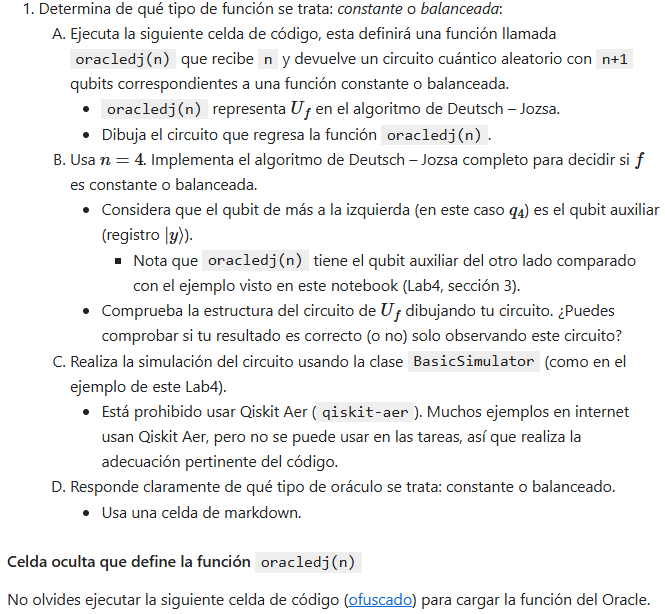

In [3]:
# exec(bytes.fromhex('0a696d706f72742072616e646f6d0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a646566206f7261636c65646a286e293a0a20202020726573756c74203d205175616e74756d43697263756974286e2b31290a20202020726573756c742e6261727269657228290a0a2020202074797065203d2072616e646f6d2e63686f696365285b22636f6e7374616e74222c202262616c616e636564225d290a2020202069662074797065203d3d2022636f6e7374616e74223a0a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a20202020656c73653a0a2020202020202020636f6e74726f6c203d2072616e646f6d2e72616e6472616e6765286e290a2020202020202020726573756c742e637828636f6e74726f6c2c206e290a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a0a20202020726573756c742e6261727269657228290a2020202072657475726e20726573756c740a20202020').decode('utf-8'))

### **A**

Definamos al Oráculo de Deutsch–Jozsa: oracledj(n)

In [4]:
def oracledj(n: int, kind: str|None=None, ancilla_at_left: bool=True, seed: int|None=None) -> QuantumCircuit:
    if seed is not None: rng2 = np.random.default_rng(seed)
    else: rng2 = rng
    nq = n+1; qc = QuantumCircuit(nq, name="Uf")
    qy = 0 if ancilla_at_left else nq-1
    xs = list(range(1,nq)) if ancilla_at_left else list(range(0,nq-1))
    if kind is None: kind = rng2.choice(["constant","balanced"])
    if kind == "constant":
        if int(rng2.integers(0,2))==1: qc.x(qy)
        qc.name = "Uf(constant)"; return qc
    s_bits = [0]*n
    while not any(s_bits): s_bits = [int(rng2.integers(0,2)) for _ in range(n)]
    for xq,s in zip(xs,s_bits):
        if s: qc.cx(xq,qy)
    if int(rng2.integers(0,2))==1: qc.x(qy)
    qc.name = "Uf(balanced)"; return qc

### **B**

Usemos n=4 y el qubit ancilla a la izquierda.

In [5]:
ANCILLA_AT_LEFT = True
n = 4
uf = oracledj(n, kind=None, ancilla_at_left=ANCILLA_AT_LEFT)

Obs:
- Podemos fijar el tipo: kind="constant" o "balanced"
- O, podemos dejar None para aleatorio.

In [6]:
def dj_circuit(uf: QuantumCircuit, ancilla_at_left=True):
    nq = uf.num_qubits; circ = QuantumCircuit(nq, nq-1)
    qy = 0 if ancilla_at_left else nq-1
    xs = list(range(1,nq)) if ancilla_at_left else list(range(0,nq-1))
    circ.x(qy)
    for q in xs: circ.h(q)
    circ.h(qy)
    circ.compose(uf, qubits=range(nq), inplace=True)
    for q in xs: circ.h(q)
    for j,q in enumerate(xs): circ.measure(q,j)
    return circ, qy, xs

In [7]:
dj_circ, qy, xs = dj_circuit(uf, ANCILLA_AT_LEFT)

### **C**

Simulación sin Aer.

In [8]:
backend = BasicProvider().get_backend("basic_simulator")
tqc = transpile(dj_circ, backend=backend, optimization_level=0)
res = backend.run(tqc, shots=4096).result()
counts = res.get_counts()

In [9]:
n_x = len(xs)
p0 = counts.get('0'*n_x, 0)/4096
decision = "constante" if np.isclose(p0,1.0) else "balanceada"

In [10]:
print("Counts x:", dict(sorted(counts.items())))
print(f"P(x=0^n)={p0:.4f}  ->  {decision.upper()}")

Counts x: {'0110': 4096}
P(x=0^n)=0.0000  ->  BALANCEADA


### **D**

Deutsch–Jozsa (n=4): si \(x=0000\) con prob. 1 ⇒ **constante**; en otro caso ⇒ **balanceada**.  
Depende que escojamos, al momento en que yo lo corrí quedo en Balanceada.


# **2**

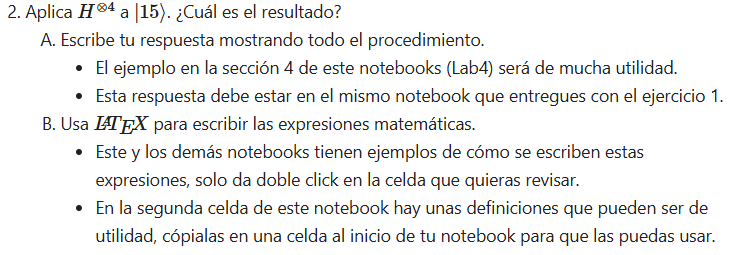

### **A**

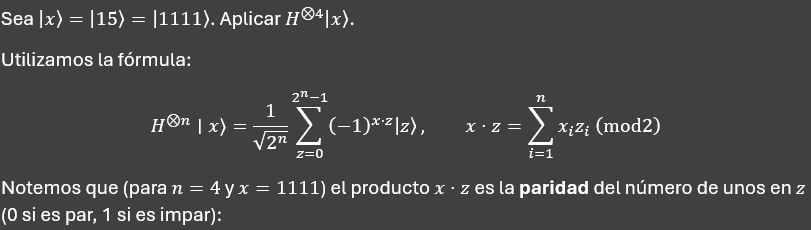

| (z) | binario $$(\to)$$ | $$(x\cdot z)$$ | $$((-1)^{x\cdot z})$$ |
| --: | :-----------: | :--------: | :---------------: |
|   0 |     (0000)    |      0     |        (+1)       |
|   1 |     (0001)    |      1     |        (-1)       |
|   2 |     (0010)    |      1     |        (-1)       |
|   3 |     (0011)    |      0     |        (+1)       |
|   4 |     (0100)    |      1     |        (-1)       |
|   5 |     (0101)    |      0     |        (+1)       |
|   6 |     (0110)    |      0     |        (+1)       |
|   7 |     (0111)    |      1     |        (-1)       |
|   8 |     (1000)    |      1     |        (-1)       |
|   9 |     (1001)    |      0     |        (+1)       |
|  10 |     (1010)    |      0     |        (+1)       |
|  11 |     (1011)    |      1     |        (-1)       |
|  12 |     (1100)    |      0     |        (+1)       |
|  13 |     (1101)    |      1     |        (-1)       |
|  14 |     (1110)    |      1     |        (-1)       |
|  15 |     (1111)    |      0     |        (+1)       |


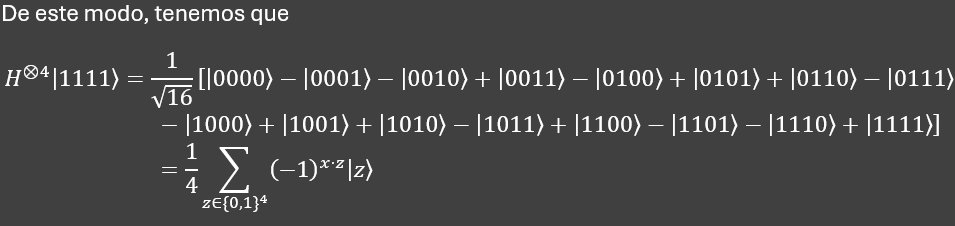

### **B**

In [11]:
# Hadamard
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1,-1]], dtype=float)

In [12]:
# H^{⊗4}
H4 = H
for _ in range(3):
    H4 = np.kron(H4, H)

In [13]:
# |15> = |1111>
ket15 = np.zeros(16); ket15[15] = 1.0

In [14]:
# Aplicar H^{⊗4}
psi = H4 @ ket15
print(psi)

[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]


In [15]:
# Mostrar amplitudes asociadas a cada |y>
basis = [''.join(map(str,b)) for b in product([0,1], repeat=4)]
for i, b in enumerate(basis):
    if abs(psi[i]) > 1e-12:
        print(f"|{b}>: {psi[i]:+.3f}")

|0000>: +0.250
|0001>: -0.250
|0010>: -0.250
|0011>: +0.250
|0100>: -0.250
|0101>: +0.250
|0110>: +0.250
|0111>: -0.250
|1000>: -0.250
|1001>: +0.250
|1010>: +0.250
|1011>: -0.250
|1100>: +0.250
|1101>: -0.250
|1110>: -0.250
|1111>: +0.250


In [16]:
# Chequeo de norma
print("\nNorma:", np.linalg.norm(psi))


Norma: 0.9999999999999997
